**Classification:
Shirt, Trees and Cars**

##QUESTION 1

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip 'Data.zip'
dat = 'Data'

Archive:  Data.zip
replace Data/shirts.20231211_001434.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/shirts.20231211_001434.jpg  
  inflating: __MACOSX/Data/._shirts.20231211_001434.jpg  
  inflating: Data/car.20231207_163415.jpg  
  inflating: __MACOSX/Data/._car.20231207_163415.jpg  
  inflating: Data/shirts.20231211_001408.jpg  
  inflating: __MACOSX/Data/._shirts.20231211_001408.jpg  
  inflating: Data/car.images (1).jpg  
  inflating: __MACOSX/Data/._car.images (1).jpg  
  inflating: Data/shirts.20231211_002854.jpg  
  inflating: __MACOSX/Data/._shirts.20231211_002854.jpg  
  inflating: Data/car.download.jpg   
  inflating: __MACOSX/Data/._car.download.jpg  
  inflating: Data/car.IMG-20231208-WA0032.jpg  
  inflating: __MACOSX/Data/._car.IMG-20231208-WA0032.jpg  
  inflating: Data/shirts.20231211_002713.jpg  
  inflating: __MACOSX/Data/._shirts.20231211_002713.jpg  
  inflating: Data/car.IMG-20231208-WA0026.jpg  
  inflating: __MACOSX/Data/._car.IMG-20231208-WA002

##Part 1
Displaying 5 examples from each class.

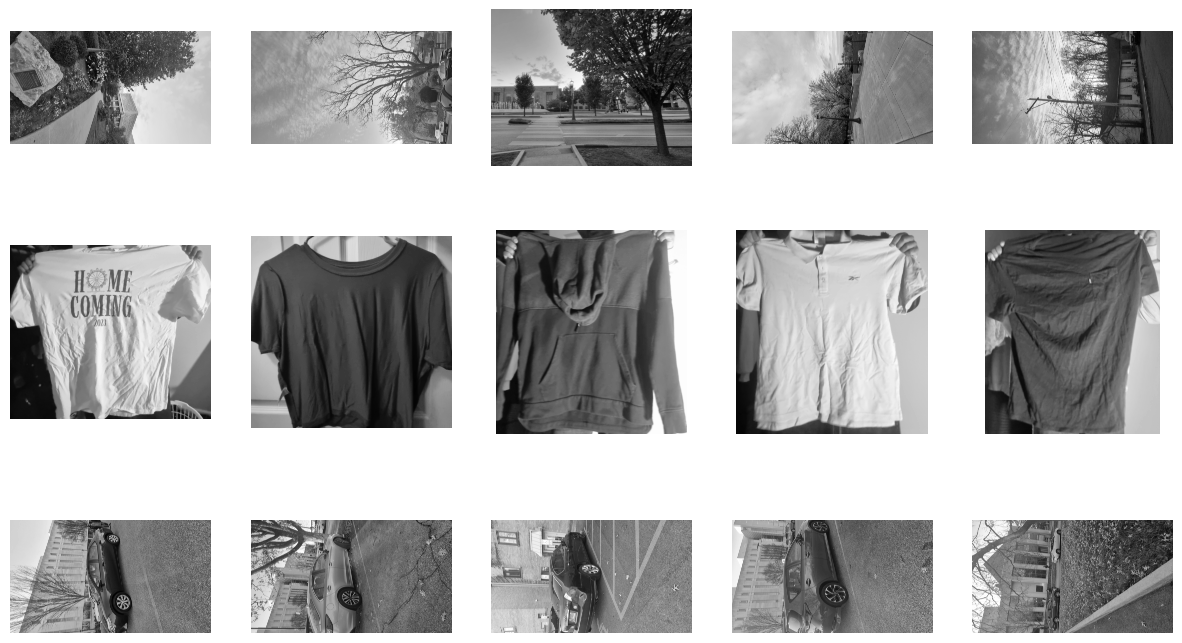

In [ ]:
from IPython.display import display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

image_files = os.listdir(dat)
class_images = {}

for image_file in image_files:
    match = re.match(r'^(.+?)\.\d+_\d+\.(jpg|jpeg)$', image_file)
    if match:
        class_name = match.group(1)
        if class_name not in class_images:
            class_images[class_name] = []
        class_images[class_name].append(image_file)

for image_file in image_files:
    match = re.match(r'^([^.\d]+)\.[a-zA-Z]+\(\d+\)\.(jpg|jpeg)$', image_file)
    if match:
        class_name = match.group(1)
        if class_name not in class_images:
            class_images[class_name] = []
        class_images[class_name].append(image_file)

fig, axs = plt.subplots(3, 5, figsize=(15, 9))

row = 0
for class_name, images in class_images.items():
    col = 0
    axs[row, 0].set_ylabel(class_name, rotation=0, labelpad=15, ha='right', va='center')
    for i, image_file in enumerate(images[:5]):
        img_path = os.path.join(dat, image_file)
        img = mpimg.imread(img_path)

        img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

        axs[row, col].imshow(img_gray, cmap='gray')
        axs[row, col].axis('off')
        col += 1
    row += 1

plt.show()




##Part 2
Splitting the images into a training set, a validation set, and a test set


In [ ]:
import shutil
from sklearn.model_selection import train_test_split

base_dataset_path = dat

train_path = '/content/dataset2/train'
val_path = '/content/dataset2/validation'
test_path = '/content/dataset2/test'

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

split_datasets = {'train': train_path, 'validation': val_path, 'test': test_path}

all_images = os.listdir(base_dataset_path)

train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

for split, images in zip(['train', 'validation', 'test'], [train_images, val_images, test_images]):
    for image in images:
        src_path = os.path.join(base_dataset_path, image)
        dst_path = os.path.join(split_datasets[split], image)

        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)
        else:
            print(f"Warning: Source file '{src_path}' not found.")



##Part 3

Building the input pipeline, including the appropriate preprocessing operations, and add data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def extract_class(filename):
    return filename.split('.')[0]

# Create dataframes
image_files_train = os.listdir('/content/dataset2/train')
image_files_val = os.listdir('/content/dataset2/validation')
image_files_test = os.listdir('/content/dataset2/test')

train_df = pd.DataFrame({'filename': image_files_train, 'label': [extract_class(file) for file in image_files_train]})
val_df = pd.DataFrame({'filename': image_files_val, 'label': [extract_class(file) for file in image_files_val]})
test_df = pd.DataFrame({'filename': image_files_test, 'label': [extract_class(file) for file in image_files_test]})

# Set up data generators with data augmentation for the training set
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    '/content/dataset2/train',
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    '/content/dataset2/validation',
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    '/content/dataset2/test',
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 215 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.
Found 61 validated image filenames belonging to 3 classes.


##Part 4
Fine-tuning a pretrained model on this dataset and reporting classification accuracy.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(class_images), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
7/7 [==============================] - 77s 9s/step - loss: 0.6544 - accuracy: 0.7814 - val_loss: 2.9334 - val_accuracy: 0.8333
Epoch 2/10
7/7 [==============================] - 50s 7s/step - loss: 0.0656 - accuracy: 0.9860 - val_loss: 4.8505 - val_accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 51s 7s/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 5.8851 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 50s 6s/step - loss: 0.0669 - accuracy: 0.9767 - val_loss: 4.1627 - val_accuracy: 0.8333
Epoch 5/10
7/7 [==============================] - 49s 7s/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 3.8927 - val_accuracy: 0.8333
Epoch 6/10
7/7 [==============================] - 49s 7s/step - loss: 0.0122 - accuracy: 0.9953 - val_loss: 4.6362 - val_accuracy: 0.7917
Epoch 7/10
7/7 [==============================] - 49s 7s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4

Few examples of correct/incorrect classification. Displaying a few images that were correctly/incorrectly classified.

2/2 [==============================] - 5s 792ms/step
Correctly Classified Examples (MobileNetV2):


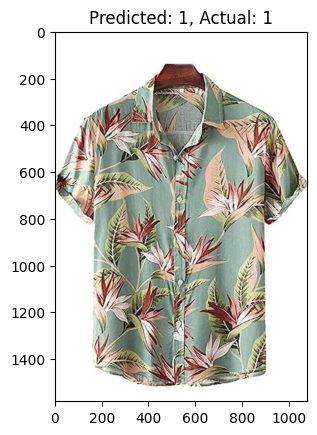

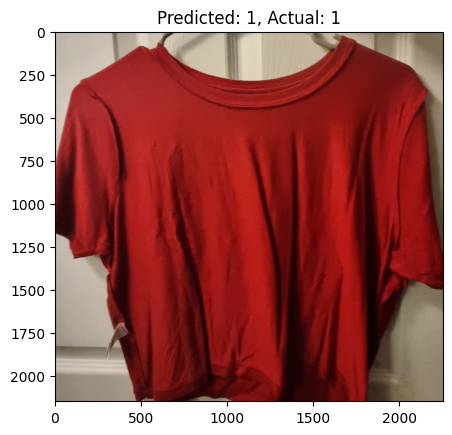

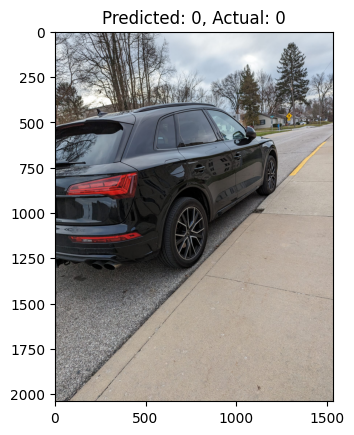

Incorrectly Classified Examples (MobileNetV2):


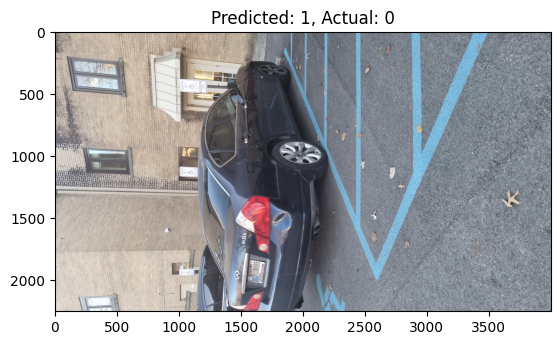

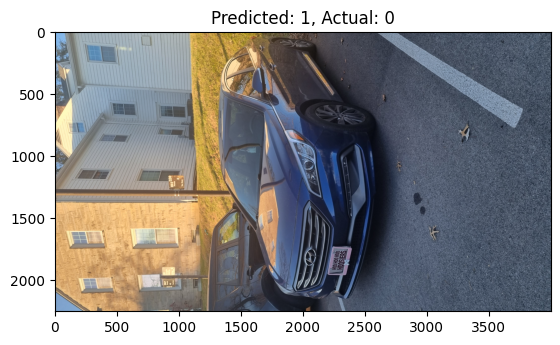

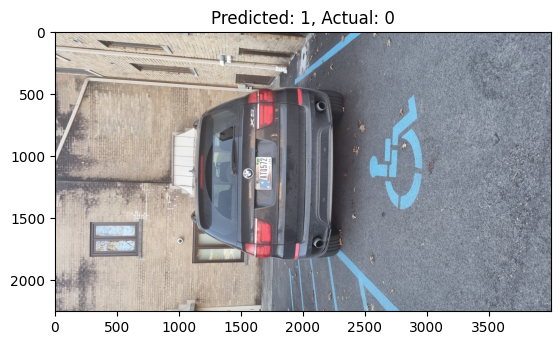

In [ ]:

predictions = model.predict(test_generator)
true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)
filenames = test_generator.filenames
correctly_classified_indices = np.where(predicted_labels == true_labels)[0]
incorrectly_classified_indices = np.where(predicted_labels != true_labels)[0]

def extract_class(filename):
    if isinstance(filename, str):
        return filename.split('.')[0]
    else:
        return str(filename)

# Display a few correctly classified images using MobileNetV2
print("Correctly Classified Examples (MobileNetV2):")
for i in range(3):
    index = correctly_classified_indices[i]
    img_path = '/content/dataset2/test/' + filenames[index]
    img = plt.imread(img_path)

    predicted_class = extract_class(predicted_labels[index])
    true_class = extract_class(true_labels[index])

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.show()

# Display a few incorrectly classified images using MobileNetV2
print("Incorrectly Classified Examples (MobileNetV2):")
for i in range(3):
    index = incorrectly_classified_indices[i]
    img_path = '/content/dataset2/test/' + filenames[index]
    img = plt.imread(img_path)

    predicted_class = extract_class(predicted_labels[index])
    true_class = extract_class(true_labels[index])

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.show()


##Part 5
Training from scratch (without pretraining) a deep neural network that contains convolutional layers on this dataset and reporting classification accuracy.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_scratch = Sequential()

model_scratch.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(128, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Flatten())
model_scratch.add(Dense(512, activation='relu'))
model_scratch.add(Dense(len(class_images), activation='softmax'))

model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_scratch = model_scratch.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss_scratch, test_acc_scratch = model_scratch.evaluate(test_generator)
print(f'Test Accuracy (Scratch): {test_acc_scratch}')


Epoch 1/10
7/7 [==============================] - 43s 6s/step - loss: 3.8497 - accuracy: 0.3395 - val_loss: 1.1534 - val_accuracy: 0.2917
Epoch 2/10
7/7 [==============================] - 40s 5s/step - loss: 1.0127 - accuracy: 0.4279 - val_loss: 0.7823 - val_accuracy: 0.8333
Epoch 3/10
7/7 [==============================] - 41s 6s/step - loss: 0.8637 - accuracy: 0.6465 - val_loss: 0.7946 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 39s 5s/step - loss: 0.7546 - accuracy: 0.6837 - val_loss: 0.7157 - val_accuracy: 0.7083
Epoch 5/10
7/7 [==============================] - 38s 5s/step - loss: 0.6354 - accuracy: 0.7442 - val_loss: 0.7497 - val_accuracy: 0.7083
Epoch 6/10
7/7 [==============================] - 40s 5s/step - loss: 0.5558 - accuracy: 0.7814 - val_loss: 0.4926 - val_accuracy: 0.7917
Epoch 7/10
7/7 [==============================] - 40s 5s/step - loss: 0.4969 - accuracy: 0.7860 - val_loss: 0.4679 - val_accuracy: 0.8333
Epoch 8/10
7/7 [==================

The model achieves a test accuracy of approximately 83.6%, indicating its ability to generalize well to unseen data.

Few examples of correct/incorrect classification. Displaying a few images that were correctly/incorrectly classified.

2/2 [==============================] - 5s 1s/step
Correctly Classified Examples:


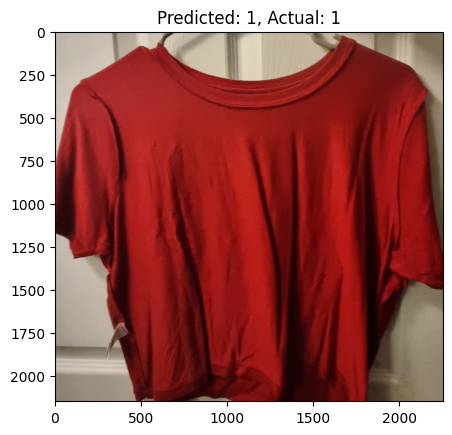

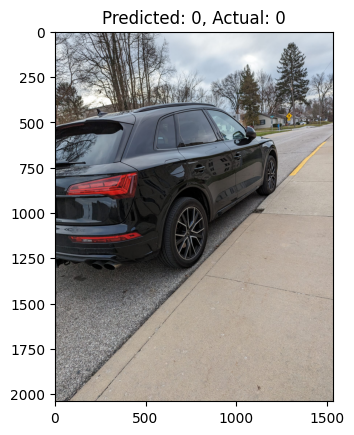

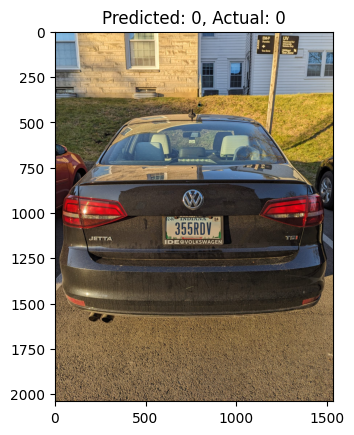

In [ ]:

predictions = model_scratch.predict(test_generator)

true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)
filenames = test_generator.filenames
correctly_classified_indices = np.where(predicted_labels == true_labels)[0]
incorrectly_classified_indices = np.where(predicted_labels != true_labels)[0]

def extract_class(filename):
    if isinstance(filename, str):
        return filename.split('.')[0]
    else:
        return str(filename)


# Display a few correctly classified images
print("Correctly Classified Examples:")
for i in range(3):
    index = correctly_classified_indices[i]
    img_path = '/content/dataset2/test/' + filenames[index]
    img = plt.imread(img_path)

    predicted_class = extract_class(predicted_labels[index])
    true_class = extract_class(true_labels[index])

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.show()


Incorrectly Classified Examples:


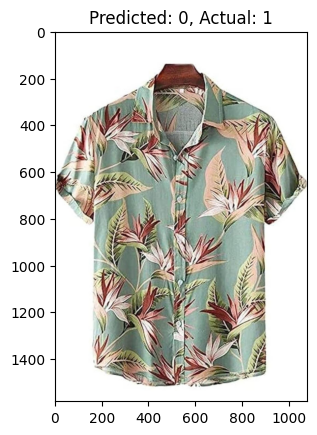

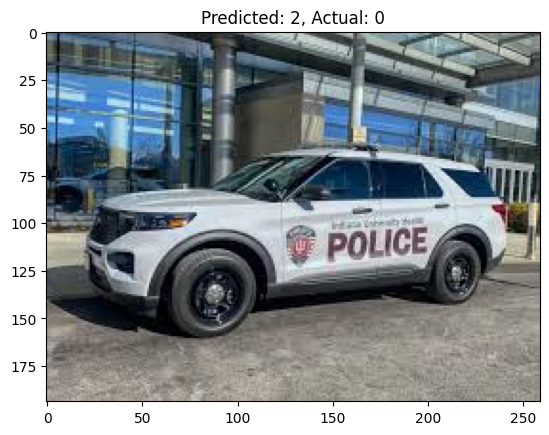

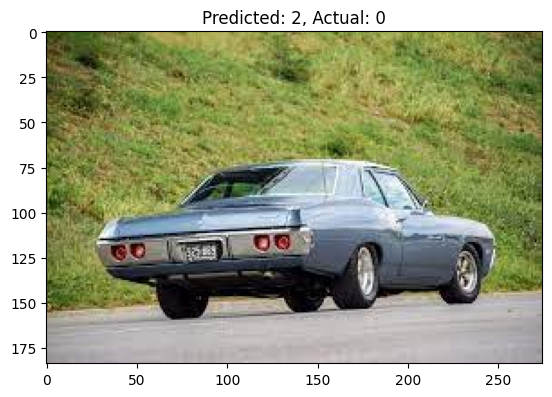

In [ ]:
# Display few incorrectly classified images
print("Incorrectly Classified Examples:")
for i in range(3):
    index = incorrectly_classified_indices[i]
    img_path = '/content/dataset2/test/' + filenames[index]
    img = plt.imread(img_path)

    predicted_class = extract_class(predicted_labels[index])
    true_class = extract_class(true_labels[index])

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.show()

References:

https://www.tensorflow.org/tutorials/images/transfer_learning

https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2

https://chat.openai.com